# Домашка.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
from typing import Callable
import pandas as pd

In [2]:
df = pd.read_csv('hw_6_data.txt', sep=' ', names=['first', 'second', 'third', 'winning', 'reporter?'])
df.head()

,first,second,third,winning,reporter?
0,2,0,0,0,1
1,0,5,1,0,1
2,0,0,0,0,1
3,2,0,0,0,1
4,0,0,0,0,1


In [3]:
report = df[df['reporter?'] == 1]
report.head()

,first,second,third,winning,reporter?
0,2,0,0,0,1
1,0,5,1,0,1
2,0,0,0,0,1
3,2,0,0,0,1
4,0,0,0,0,1


In [4]:
report.shape

(138, 5)

In [5]:
valuesf, countsf = np.unique(report['first'], return_counts=True)
valuesf, countsf
def numToInd(a):
    return a - (a > 4)


In [6]:
report = report - (report > 4)
report.head()

,first,second,third,winning,reporter?
0,2,0,0,0,1
1,0,4,1,0,1
2,0,0,0,0,1
3,2,0,0,0,1
4,0,0,0,0,1


In [7]:
names = ['first', 'second', 'third']
model = [np.unique(report[name], return_counts=True)[1] / 138 for name in names]
print(model[1])
model[1] = np.append(model[1], model[1][5])
model[1][5] = 0
model[1]

[0.61594203 0.05797101 0.17391304 0.11594203 0.00724638 0.02898551]


array([0.61594203, 0.05797101, 0.17391304, 0.11594203, 0.00724638,
       0.        , 0.02898551])

In [8]:
for name in names:
    print(np.unique(report[name], return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6], dtype=int64), array([59, 49, 14,  6,  3,  1,  6], dtype=int64))
(array([0, 1, 2, 3, 4, 6], dtype=int64), array([85,  8, 24, 16,  1,  4], dtype=int64))
(array([0, 1, 2, 3, 4, 5, 6], dtype=int64), array([77, 39,  6,  1,  5,  3,  7], dtype=int64))


# Алмазов нет или 3.

In [9]:
epicBar = sum([model[0][i] * model[1][i] * model[2][i] for i in range(1, 4)])
anyBar = [sum([model[0][i] for i in range(1, 4)]),
          sum([model[1][i] for i in range(1, 4)]),
          sum([model[2][i] for i in range(1, 4)])]

noDvals = [10, 25, 40, 800, 10, 80, 5, 5, 2]
notcd = [1 - model[i][5] - model[i][4] for i in range(3)]
noDprobs = [model[0][i] * model[1][i] * model[2][i] for i in range(1, 7)] + [
    anyBar[0] * anyBar[1] * anyBar[2] - epicBar, #three any bars
    model[0][5] * model[1][5] * notcd[2] + model[0][5] * model[2][5] * notcd[1] + model[2][5] * model[1][5] * notcd[0], #two cherries
    model[0][5] * notcd[1] * notcd[2] + notcd[0] * model[1][5] * notcd[2] + model[2][5] * notcd[1] * notcd[0]] #one cherry
noDvals, noDprobs

([10, 25, 40, 800, 10, 80, 5, 5, 2],
 [0.005817192223044118,
  0.0007671022711706529,
  3.65286795795549e-05,
  5.707606184305453e-06,
  0.0,
  6.392518926422107e-05,
  0.05135019131895929,
  0.0001563884094499694,
  0.027732877942461244])

Вишенки во втором окошке нет

## Один алмаз.

In [10]:
oneDvals = [20, 50, 80, 20, 160, 10, 10]
anyDif = [
    anyBar[(1 + j) % 3] * anyBar[(2 + j) % 3] - sum([model[(1 + j) % 3][i] * model[(2 + j) % 3][i]
                                                     for i in range (1, 4)]) for j in range(3)
]
oneDprobs = [model[0][4] * model[1][i] * model[2][i] + model[1][4] * model[0][i] * model[2][i] + model[2][4] * model[1][i] * model[0][i]
            for i in range(1, 7) if i != 4] + [
    model[0][4] * anyDif[0] + model[1][4] * anyDif[1] + model[2][4] * anyDif[2],
    sum([model[t][4] * (model[(t + 1) % 3][5] * notcd[(t + 2) % 3] + model[(t + 2) % 3][5] * notcd[(t + 1) % 3]) 
         for t in range(3)])
]

## Два алмаза.

In [11]:
twoDvals = [40, 100, 160, 40, 320]
twoDprobs = [
    model[0][4] * model[1][4] * model[2][i] + model[0][4] * model[2][4] * model[1][i] + model[2][4] * model[1][4] * model[0][i]
    for i in range(1, 7) if i != 4
]

## Lose.

In [12]:
losev = [0]
losep = [1 - sum(noDprobs + oneDprobs + twoDprobs)]

In [13]:
reward = ss.rv_discrete(values=(noDvals + oneDvals + twoDvals + losev, noDprobs + oneDprobs + twoDprobs + losep))

In [14]:
reward.mean()

0.6467756591143622

In [15]:
stats = []
for i in range(10000):
    sample = reward.rvs(size=138, random_state=i)
    stats.append(sample.mean())
a = 0.95
l, r = np.quantile(stats, (1 - a) / 2), np.quantile(stats, (1 + a) / 2)
l, r

(0.2391304347826087, 1.644927536231884)

In [16]:
r - l

1.4057971014492754

## Другой подход.


In [17]:
def winning(a, b, c):
    cs = [0, 0, 0, 0, 0, 0, 0]
    cs[a] += 1
    cs[b] += 1
    cs[c] += 1
    trips = [0, 10, 25, 40, 800, 10, 80]
    for i, t in enumerate(cs):
        if t == 3: return trips[i]
    if sum(cs[1:4]) == 3: return 5
    if cs[5] == 2 and cs[4] == 0: return 5
    if cs[5] == 1 and cs[4] == 0: return 2
    if cs[4] == 1:
        for i, t in enumerate(cs):
            if t == 2: return 2 * trips[i]
        if cs[5] == 1: return 10
        if sum(cs[1:4]) == 2: return 10
    if cs[4] == 2:
        for i, t in enumerate(cs):
            if t == 1: return 4 * trips[i]
    return 0

In [18]:
vals, probs = [], []
for a in range(7):
    for b in range(7):
        for c in range(7):
            vals.append(winning(a, b, c))
            probs.append(model[0][a] * model[1][b] * model[2][c])
            
new_reward = ss.rv_discrete(values=(vals, probs))

In [19]:
new_reward.mean()

0.6467756591143623

In [20]:
stats = []
for i in range(10000):
    sample = new_reward.rvs(size=138, random_state=i)
    stats.append(sample.mean())
a = 0.95
l, r = np.quantile(stats, (1 - a) / 2), np.quantile(stats, (1 + a) / 2)
l, r

(0.2391304347826087, 1.644927536231884)

# Новая глава.

In [21]:
newModel = [1 / 2, 1 / 4, 1 / 8, 1 / 16, 1 /64, 1 / 64, 1 / 32]

nvals = []
nprobs = []

for a in range(7):
    for b in range(7):
        for c in range(7):
            nvals.append(winning(a, b, c))
            nprobs.append(newModel[a] * newModel[b] * newModel[c])
            
new_reward = ss.rv_discrete(values=(nvals, nprobs))

## Student

In [22]:
meanies = 0
BIG = 10000
size = 138
a = 0.95
m = new_reward.mean()
for i in range(10000):
    sample = new_reward.rvs(size=size, random_state=i)
    l, r = ss.t.interval(a, loc = sample.mean(), scale = sample.std(ddof=1) / np.sqrt(size), df = size - 1)
    meanies += (l <= m <= r)
meanies / BIG

0.8717

## Эфрон

In [23]:
BIG = 1000
meanies = 0
a = 0.95
m = new_reward.mean()
for i in range(1000):
    sample = new_reward.rvs(size=138, random_state=i)
    np.random.seed(i)
    # генерируем 10000 бутстрэповских выборок за раз
    resamples = np.random.choice(sample, size=(138, 10000), replace=True) 
    theres = resamples.mean(axis=0)
    l, r = np.quantile(theres, (1 - a) / 2), np.quantile(theres, (1 + a) / 2)
    meanies += (l <= m <= r)
meanies / BIG

0.881

In [24]:
m, new_reward.mean()

(0.85595703125, 0.85595703125)

## BCa

In [25]:


meanies = 0
a = 0.95
wats = 0
for i in range(1000):
    sample = new_reward.rvs(size=138, random_state=i)
    np.random.seed(i)
    # Используйте эти бутстрэповские выборки при вычислении BCa интервала 
    resamples = np.random.choice(sample, size=(138, 10000), replace=True)
    theres = resamples.mean(axis=0)
    z = ss.norm.ppf(len(theres[theres < sample.mean()]) / 10000)
    mtheres = np.array([np.mean(np.delete(sample, j)) for j in range(138)])
    tt = mtheres.mean()
    mtheres = tt - mtheres
    num = sum(mtheres ** 3)
    denum = 6 * sum(mtheres ** 2) ** 1.5
    aa = num / denum
    za = ss.norm.ppf((1 - a) / 2)
    z1ma = ss.norm.ppf((1 + a) / 2)
    z1 = ss.norm.cdf(z + (z + za) / (1 - aa * (z + za)))
    z2 = ss.norm.cdf(z + (z + z1ma) / (1 - aa * (z + z1ma)))
    l, r = np.quantile(theres, z1), np.quantile(theres, z2)
    meanies += (l <= m <= r)
meanies / 1000

0.906

## Стабилизированный стьюдент

In [26]:
meanies = 0
BIG = 10000
size = 138
a = 0.95
m = new_reward.mean()
for i in range(10000):
    sample = new_reward.rvs(size=size, random_state=i)
    l, r = ss.t.interval(a, loc = np.log(sample.mean()), scale = sample.std(ddof=1) / (sample.mean() * np.sqrt(size)),
                         df = size - 1)
    meanies += (l <= np.log(m) <= r)
meanies / BIG

0.9181

## p-value Эфрон

In [33]:
BIG = 1000
pies = []
a = 0.95
m = new_reward.mean()
for i in range(1000):
    sample = new_reward.rvs(size=138, random_state=i)
    np.random.seed(i)
    # генерируем 10000 бутстрэповских выборок за раз
    resamples = np.random.choice(sample, size=(138, 10000), replace=True) 
    theres = resamples.mean(axis=0)
    pies.append(1 - len(theres[theres <= m]) / 10000)

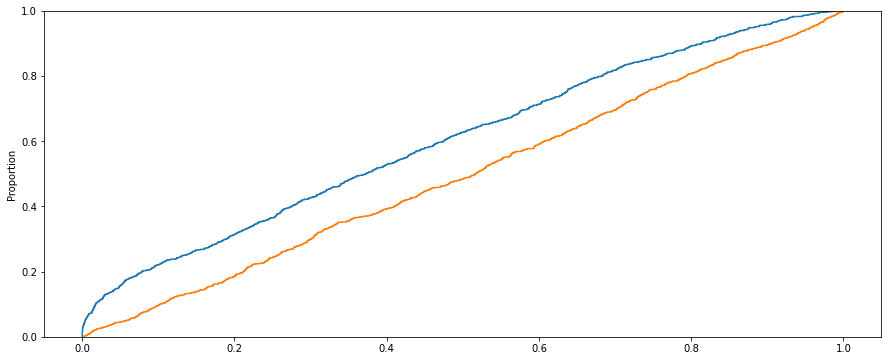

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
sns.ecdfplot(data=pies)
uni = ss.uniform(loc=0, scale=1).rvs(size=1000, random_state=38)
sns.ecdfplot(data=uni)
plt.show()

In [45]:
np.quantile(pies, 0.5)

0.37265000000000004

In [46]:
from scipy.optimize import minimize
res = minimize(lambda x: np.quantile(pies, x) - x, x0=[0.5], 
               bounds=[[np.power(10.0, -5), 1 - np.power(10.0, -5)]])
print(res)

      fun: array([-0.12932162])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([5.5511151e-09])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 82
      nit: 5
     njev: 41
   status: 0
  success: True
        x: array([0.62162161])
